# Logistic Regression  

Logistic regression is a classification algorithm used to assign observations to a discrete set of classes.  
Unlike linear regression which outputs continuous number values, logistic regression transforms its output using the **logistic sigmoid function** to return a probability value which can then be mapped to two or more discrete classes.  

---

## Logistic Regression can be used for:
- **Binary Classification**  
- **Multi-class Classification**  
- **One-vs-Rest Classification**  

---

## Assumptions of Logistic Regression:
1. The dependent variable must be **categorical** in nature.  
2. The independent variables (features) must be **independent**.  
3. There should be **no outliers** in the data (check for outliers).  
4. There should be **no high correlations** among the independent variables (check using a correlation matrix).  


# Sigmoid Function in Logistic Regression  

The **sigmoid function** is the core of logistic regression.  
It maps any real-valued number into a range between **0 and 1**, making it ideal for probability estimation.  

The mathematical formula for the sigmoid function is:  

\[
\sigma(z) = \frac{1}{1 + e^{-z}}
\]

Where:  
- \( z \) = linear combination of input features (e.g., \( z = w_0 + w_1x_1 + w_2x_2 + \dots + w_nx_n \))  
- \( e \) = Euler’s number (~2.718)  

---

## Key Properties:
- The output of sigmoid is always between **0 and 1**.  
- If \( z \) → +∞, then \( \sigma(z) \) → 1.  
- If \( z \) → -∞, then \( \sigma(z) \) → 0.  
- At \( z = 0 \), \( \sigma(z) = 0.5 \).  

---

## Why use Sigmoid in Logistic Regression?
- It converts linear regression output into **probabilities**.  
- Allows classification into discrete categories:  
  - If probability ≥ 0.5 → class **1**  
  - If probability < 0.5 → class **0**  


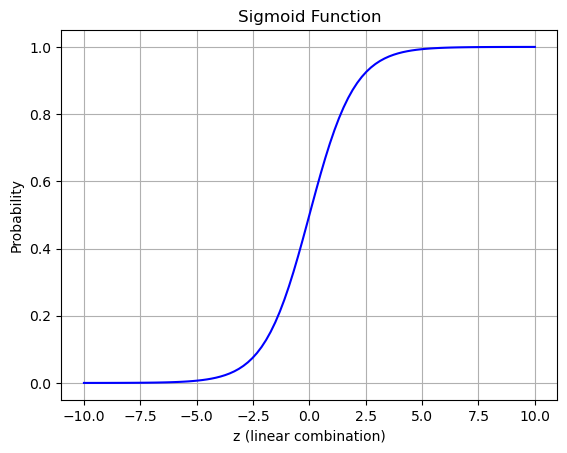

In [17]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit  # sigmoid function

# sample input
x = np.linspace(-10, 10, 100)
y = expit(x)  # sigmoid

plt.plot(x, y, color="blue")
plt.title("Sigmoid Function")
plt.xlabel("z (linear combination)")
plt.ylabel("Probability")
plt.grid(True)
plt.show()

In [18]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,precision_score,classification_report,confusion_matrix,accuracy_score,recall_score

import warnings
warnings.filterwarnings('ignore')

In [19]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [20]:
# pre prcoess the data
# remove the deck column
df.drop('deck', axis=1, inplace=True)
# impute missing values in age and fare
df['age'].fillna(df['age'].median(), inplace=True)
df['fare'].fillna(df['fare'].median(), inplace=True)
# impute missing values in embark and embarked town
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

# encode the categorical variables using for loop where object and categoy datatypes are given
for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype.name == 'category':
        df[col] = LabelEncoder().fit_transform(df[col])
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,True,2,0,False
1,1,1,0,38.0,1,0,71.2833,0,0,2,False,0,1,False
2,1,3,0,26.0,0,0,7.9250,2,2,2,False,2,1,True
3,1,1,0,35.0,1,0,53.1000,2,0,2,False,2,1,False
4,0,3,1,35.0,0,0,8.0500,2,2,1,True,2,0,True


In [21]:
# X and y column
X = df.drop('survived', axis=1)
y = df['survived']

In [22]:
# train test split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

# model call
model = LogisticRegression()

# train the model
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [23]:
# predict the values
y_pred = model.predict(X_test)

In [24]:
# evaluate the model
print('Accuracy Score: ', accuracy_score(y_test, y_pred))
print('Recall Score: ', recall_score(y_test, y_pred))
print('Precision Score: ', precision_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
print('Classification Report: \n', classification_report(y_test, y_pred))

Accuracy Score:  1.0
Recall Score:  1.0
Precision Score:  1.0
F1 Score:  1.0
Confusion Matrix: 
 [[105   0]
 [  0  74]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        74

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179

